In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset
df = getNormalizedDataset()
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

df.shape

(230396, 18)
(230060, 18)
(230041, 18)
(220417, 19)


(220417, 23)

Text(0.5, 1.0, 'Cantidad de publicaciones según el año \n')

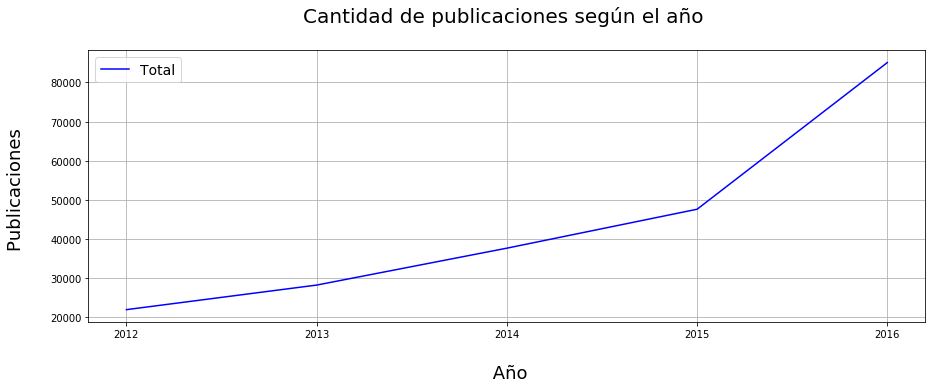

In [16]:
# Veamos el comportamiento a nivel general de ZonaProp en Mexico
zpropMexico = df.groupby(['año']).size()
zpropMexico = zpropMexico.reset_index()
zpropMexico.rename(columns={0:'Publicaciones'}, inplace=True)
total = ((zpropMexico.sum()).values)[1]

fig, ax = plt.subplots(figsize=(15 ,5))
ax.plot(zpropMexico['año'], zpropMexico['Publicaciones'], label='Total', color='blue')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año", fontsize=18)
ax.set_ylabel("Publicaciones \n", fontsize=18)
ax.legend(loc='best', title_fontsize=16, fontsize=14)
ax.set_title('Cantidad de publicaciones según el año \n', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Crecimiento porcentual según sub-período \n')

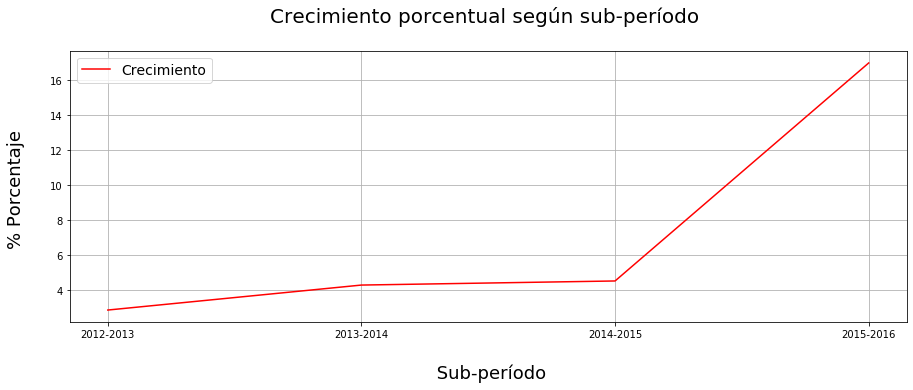

In [17]:

## Analisis de variacion entre periodos

nDf = zpropMexico.set_index('año')
dfVariacion = pd.DataFrame(columns=['period', 'variation'])
dfVariacion = dfVariacion.append({ "period": '2012-2013', "variation": (nDf.loc[2013].Publicaciones - nDf.loc[2012].Publicaciones) * 100 / total}, ignore_index=True)
dfVariacion = dfVariacion.append({ "period": '2013-2014', "variation": (nDf.loc[2014].Publicaciones - nDf.loc[2013].Publicaciones) * 100 / total}, ignore_index=True)
dfVariacion = dfVariacion.append({ "period": '2014-2015', "variation": (nDf.loc[2015].Publicaciones - nDf.loc[2014].Publicaciones) * 100 / total}, ignore_index=True)
dfVariacion = dfVariacion.append({ "period": '2015-2016', "variation": (nDf.loc[2016].Publicaciones - nDf.loc[2015].Publicaciones) * 100 / total}, ignore_index=True)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dfVariacion['period'], dfVariacion['variation'], label='Crecimiento', color='red')

plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Sub-período", fontsize=18)
ax.set_ylabel("% Porcentaje \n", fontsize=18)
ax.legend(loc='best', title_fontsize=16, fontsize=14)
ax.set_title('Crecimiento porcentual según sub-período \n', fontdict={'fontsize':20})


In [11]:
# Hipotesis:
# En que ciudades vario mas las cantidades de publicaciones durante los 5 años?.
# Armar una tabla tipo pivot de: provincias vs años, y en el valor pongo la cantidad de publicaciones

data = df.groupby(['provincia','año']).size()
data = data.reset_index()
data.rename(columns={0:'count'}, inplace=True)
data = data.pivot(index='provincia', columns='año', values='count')
data = data.reset_index()
data.columns = ['provincia',2012,2013,2014,2015,2016]
data['total'] = data[2012]+data[2013]+data[2014]+data[2015]+data[2016]
data['variacion_total'] = (data[2016]-data[2012])/data['total'] * 100
data['variacion_2012-2013'] = (data[2013]-data[2012])/data['total'] * 100
data['variacion_2013-2014'] = (data[2014]-data[2013])/data['total'] * 100
data['variacion_2014-2015'] = (data[2015]-data[2014])/data['total'] * 100
data['variacion_2015-2016'] = (data[2016]-data[2015])/data['total'] * 100
#data.max()
# data.iloc[data['variacion_2012-2013'].idxmax(),:]
# Vemos que hay publicaciones

0
1
2
3


,provincia,2012,2013,2014,2015,2016,total,variacion_total,variacion_2012-2013,variacion_2013-2014,variacion_2014-2015,variacion_2015-2016
0,Baja California Sur,14.21,59.73,4.29,9.85,11.91,1654,-2.30,45.53,-55.44,5.56,2.06
1,Michoacán,12.36,8.51,21.58,20.06,37.49,2363,25.14,-3.85,13.08,-1.52,17.44
2,Jalisco,4.75,5.97,13.12,25.72,50.44,20137,45.70,1.22,7.15,12.61,24.72
3,Tlaxcala,7.77,15.91,20.22,9.12,46.98,811,39.21,8.14,4.32,-11.10,37.85


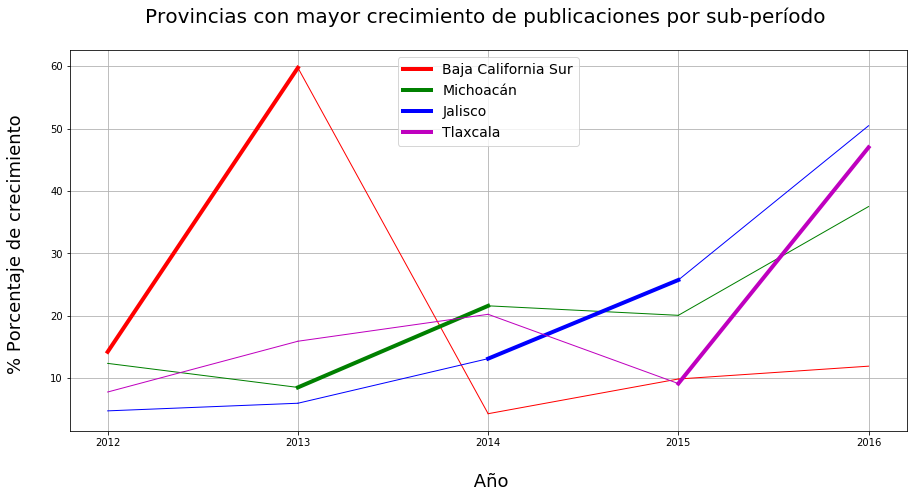

In [12]:
# Que provincias presentaron mayor crecimiento en cuanto a cantidad de publicaciones año a año?
# Esta informacion puede servir ya que se puede ver donde va creciendo y teniendo mas lugares para vivir cierta zona


d1 = data['variacion_2012-2013'].idxmax()
d2 = data['variacion_2013-2014'].idxmax()
d3 = data['variacion_2014-2015'].idxmax()
d4 = data['variacion_2015-2016'].idxmax()

# Pasar a valores relativos porcentuales.
d = data.loc[[d1, d2, d3, d4], : ]

d[2012] = d[2012]/d['total']*100
d[2013] = d[2013]/d['total']*100
d[2014] = d[2014]/d['total']*100
d[2015] = d[2015]/d['total']*100
d[2016] = d[2016]/d['total']*100


fig, ax = plt.subplots(figsize=(15,7))
plt.grid(b=True, which='major', axis='both')
d = d.reset_index(drop=True)
for index, row in d.iterrows():
    print(index)
    row = d.loc[[index], :]
    label = row['provincia'].tolist()[0]
    total = row.total
    row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    año = row.variable.to_list()
    valor = row.value.to_list()
    colors=['r', 'g', 'b', 'm']
    for i, (x1, x2, y1, y2) in enumerate(zip(año, año[1:], valor, valor[1:])):
        if(i == index): 
            ax.plot([x1, x2], [y1, y2], colors[index], label=label, linewidth=4)
        ax.plot([x1, x2], [y1, y2], colors[index], linewidth=1)

#     ax.plot(año, valor, label=label)
    
plt.legend(fontsize=20)
plt.xticks([2012,2013,2014,2015,2016])
#plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("\n Año", fontsize=18)
ax.set_ylabel("% Porcentaje de crecimiento \n", fontsize=18)   
ax.legend(loc='best', title_fontsize=16, fontsize=14)
ax.set_title('Provincias con mayor crecimiento de publicaciones por sub-período \n', fontdict={'fontsize':20})
    
d

Text(0.5, 1.0, 'Provincias con mayor decrecimiento de publicaciones por sub-período \n')

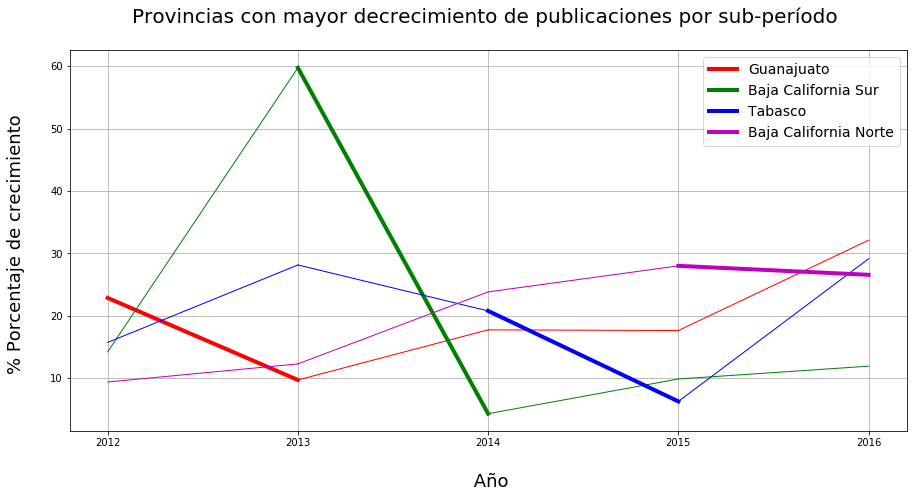

In [13]:
# Que provincias presentaron mayor decrecimiento en cuanto a cantidad de publicaciones año a año?
# Esta informacion puede servir ya que se puede ver donde va creciendo y teniendo mas lugares para vivir cierta zona

d1 = data['variacion_2012-2013'].idxmin()
d2 = data['variacion_2013-2014'].idxmin()
d3 = data['variacion_2014-2015'].idxmin()
d4 = data['variacion_2015-2016'].idxmin()

# Pasar a valores relativos porcentuales.
d = data.loc[[d1, d2, d3, d4], : ]
d = d.reset_index(drop=True)
d[2012] = d[2012]/d['total']*100
d[2013] = d[2013]/d['total']*100
d[2014] = d[2014]/d['total']*100
d[2015] = d[2015]/d['total']*100
d[2016] = d[2016]/d['total']*100

fig, ax = plt.subplots(figsize=(15,7))
plt.grid(b=True, which='major', axis='both')
for index, row in d.iterrows():

    row = d.loc[[index], :]
    label = row['provincia'].tolist()[0]
    total = row.total
    row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    año = row.variable.to_list()
    valor = row.value.to_list()
    colors=['r', 'g', 'b', 'm']
    for i, (x1, x2, y1, y2) in enumerate(zip(año, año[1:], valor, valor[1:])):
        if(i == index): 
            ax.plot([x1, x2], [y1, y2], colors[index], label=label, linewidth=4)
        ax.plot([x1, x2], [y1, y2], colors[index], linewidth=1)
    

plt.xticks([2012,2013,2014,2015,2016])
#plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("\n Año", fontsize=18)
ax.set_ylabel("% Porcentaje de crecimiento \n", fontsize=18)
ax.legend(loc='best', title_fontsize=16, fontsize=14)  
ax.set_title('Provincias con mayor decrecimiento de publicaciones por sub-período \n', fontdict={'fontsize':20})
    


<bound method NDFrame.head of index  newIndex  2012  2013  2014  2015  2016   total  variacion_2012-2013  \
0             1 11.73 18.27 16.53 17.20 36.26 6888.03                 0.07   

index  variacion_2013-2014  variacion_2014-2015  variacion_2015-2016  \
0                    -0.02                 0.01                 0.19   

index  variacion_total  
0                 0.25  >


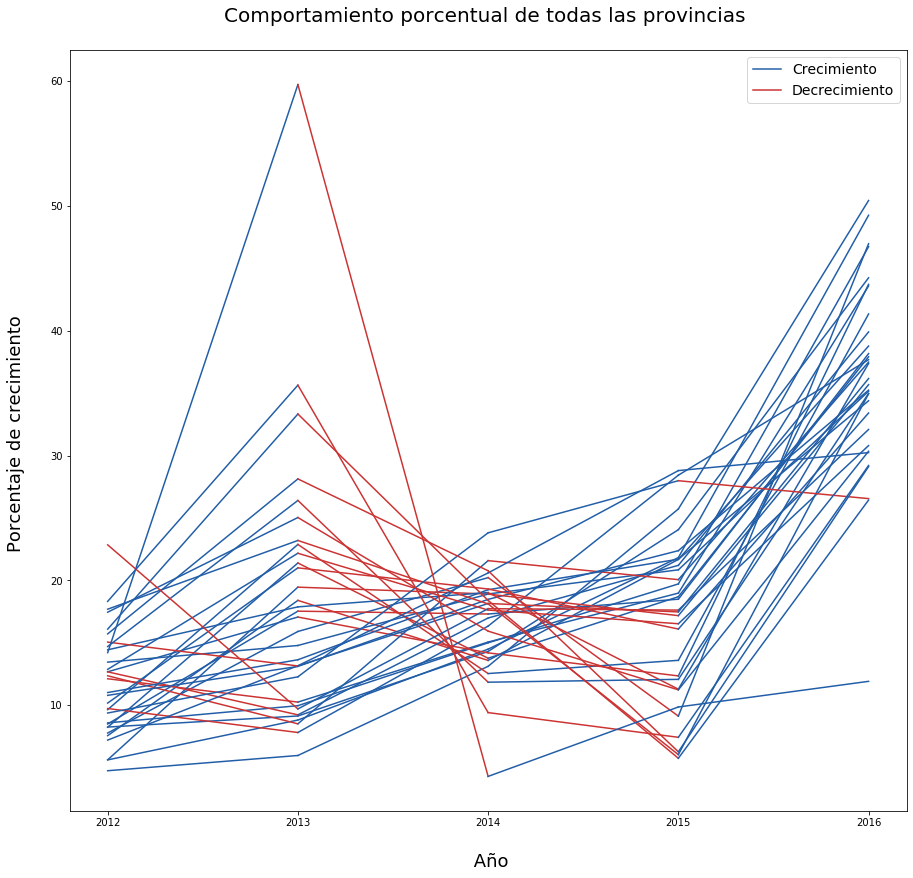

In [14]:
# Que provincias presentaron mayor decrecimiento en cuanto a cantidad de publicaciones año a año?
# Esta informacion puede servir ya que se puede ver donde va creciendo y teniendo mas lugares para vivir cierta zona

data = df.groupby(['provincia','año']).size()
data = data.reset_index()
data.rename(columns={0:'count'}, inplace=True)
data = data.pivot(index='provincia', columns='año', values='count')
data = data.reset_index()
data.columns = ['provincia',2012,2013,2014,2015,2016]
data['total'] = data[2012]+data[2013]+data[2014]+data[2015]+data[2016]
data['variacion_total'] = (data[2016]-data[2012])/data['total']
data['variacion_2012-2013'] = (data[2013]-data[2012])/data['total']
data['variacion_2013-2014'] = (data[2014]-data[2013])/data['total']
data['variacion_2014-2015'] = (data[2015]-data[2014])/data['total']
data['variacion_2015-2016'] = (data[2016]-data[2015])/data['total']
d = data.sort_values(by='variacion_total', ascending=False)

d[2012] = d[2012]/d['total']*100
d[2013] = d[2013]/d['total']*100
d[2014] = d[2014]/d['total']*100
d[2015] = d[2015]/d['total']*100
d[2016] = d[2016]/d['total']*100


fig, ax = plt.subplots(figsize=(15,14))

hasRedLabel = False
hasBlueLabel = False
for index, row in d.iterrows():
    row = d.loc[[index], :]
    label = row['provincia'].tolist()[0]
    total = row.total
    meltRow = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    año = meltRow.variable.to_list()
    valor = meltRow.value.to_list()
    colors=['r', 'g', 'b', 'm']
    for i, (x1, x2, y1, y2) in enumerate(zip(año, año[1:], valor, valor[1:])):
        variation = 0
        label = ""
        if(i == 0): variation = row['variacion_2012-2013']
        if(i == 1): variation = row['variacion_2013-2014']
        if(i == 2): variation = row['variacion_2014-2015']            
        if(i == 3): variation = row['variacion_2015-2016']
        if(variation.values[0] < 0 and not hasRedLabel) :
            hasRedLabel = True
            label = 'Decrecimiento'
            
        if(variation.values[0] >= 0 and not hasBlueLabel) :
            hasBlueLabel = True
            label = 'Crecimiento'
            
#         print([x1, x2], [y1, y2])
        ax.plot([x1, x2], [y1, y2], color='#cc3333' if variation.values[0] < 0 else '#225ea8', label=label)
#         ax.plot([x1, x2], [y1, y2], color=variation, linewidth=1)

#         ax.plot(año, valor, label=label, color='c' if index < 15 else 'y')
    
newDf = d.mean().reset_index()

newDf['newIndex'] = 1
newDf = newDf.pivot(columns='index', index="newIndex", values=0).reset_index()
print(newDf.head)
# for index, row in newDf.iterrows():

#     row = newDf.loc[[index], :]
#     label = 'Total'
#     total = row.total
#     row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
#     print(row)
#     año = row['index']
#     valor = row.value
#     ax.plot(año, valor, label=label, color=(0.204, 0.51, 0.51) if index < 15 else (0.34, 0.94, 0.168))
#     plt.legend(['Crecimiento', 'Decrecimiento'])
    
plt.xticks([2012,2013,2014,2015,2016])
#plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("\n Año", fontsize=18)
ax.set_ylabel("Porcentaje de crecimiento \n", fontsize=18)
ax.legend(loc='best', title_fontsize=16, fontsize=14)   
ax.set_title("Comportamiento porcentual de todas las provincias \n", fontsize=20)
plt.legend(fontsize=14)



In [15]:
data.sort_values(by="total", ascending=False
                ).head(30)

,provincia,2012,2013,2014,2015,2016,total,variacion_total,variacion_2012-2013,variacion_2013-2014,variacion_2014-2015,variacion_2015-2016
8,Distrito Federal,5579,6910,9754,10991,17424,50658,0.23,0.03,0.06,0.02,0.13
10,Edo. de México,4118,5003,7054,8544,13454,38173,0.24,0.02,0.05,0.04,0.13
14,Jalisco,956,1202,2641,5180,10158,20137,0.46,0.01,0.07,0.13,0.25
21,Querétaro,1357,1503,2354,3960,7281,16455,0.36,0.01,0.05,0.10,0.20
18,Nuevo León,770,1208,1987,2993,6755,13713,0.44,0.03,0.06,0.07,0.27
20,Puebla,848,984,1482,1948,4618,9880,0.38,0.01,0.05,0.05,0.27
23,San luis Potosí,549,1003,1570,2195,2305,7622,0.23,0.06,0.07,0.08,0.01
30,Yucatán,952,693,1276,1593,2998,7512,0.27,-0.03,0.08,0.04,0.19
16,Morelos,1064,929,1283,1235,2557,7068,0.21,-0.02,0.05,-0.01,0.19
29,Veracruz,532,427,893,1554,2060,5466,0.28,-0.02,0.09,0.12,0.09
